In [1]:
import sys
import os
import os.path as osp

sys.path.insert(0, "../utils/")
sys.path.insert(0, "../")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

In [3]:
def image_show(image, figsize=(7, 7)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(image, interpolation='nearest')
    plt.tight_layout()
    plt.show()
    

def image_grid_show(image_stack, figsize=(12, 12)):
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                    )
    stack_indices = [i for i in range(image_stack.shape[0])]
    for ax, im_idx in zip(grid, stack_indices):
        ax.imshow(image_stack[im_idx])
    
    plt.show()

# Configuration file parser

In [4]:
from utils.read_config import yaml_to_object

In [5]:
config = yaml_to_object("./../config.yaml")

root_dir = osp.abspath(osp.dirname("."))

setattr(config, "root_dir", osp.dirname(root_dir))

# MPIIAnnotationHandler

In [6]:
from utils.data import MPIIAnnotationHandler

In [7]:

# config.root_dir, data_path, training_annotation_file, validation_annotation_file, image_dir

In [8]:
data_path = osp.join(config.root_dir, config.data.MPII.path.base)

training_annotation_file = osp.join(data_path, config.data.MPII.path.annotations.training)
validation_annotation_file = osp.join(data_path, config.data.MPII.path.annotations.validation)
image_dir = osp.join(data_path, config.data.MPII.path.images)
handle = MPIIAnnotationHandler(training_annotation_file, validation_annotation_file, image_dir)


loading data...
Done (t=3.63s)


In [9]:
sample = handle.get_annotation(idx=0)

In [10]:
train_indices, valid_indices = handle.split_data()

In [11]:
train_indices.shape, valid_indices.shape

((22246,), (2958,))

# MPIIDataset

In [12]:
from utils.data import MPIIDataset

In [13]:
train_dataset = MPIIDataset(
    indices=train_indices,
    mpii_annotation_handle=handle,
    horizontally_flipped_keypoint_ids=config.data.MPII.parts.flipped_ids
    input_resolution=config.neural_network.train.input_resolution,
    output_resolution=config.neural_network.train.output_resolution,
    num_parts=config.data.MPII.parts.max_count,
    reference_image_size=config.data.MPII.reference_image_size,
    max_rotation_angle=config.neural_network.train.data_augmentation.rotation_angle_max,
    image_scale_factor_range=(config.neural_network.train.data_augmentation.image_scale_factor.min, config.neural_network.train.data_augmentation.image_scale_factor.max),
    image_color_jitter_probability=config.neural_network.train.data_augmentation.image_color_jitter_probability,
    image_horizontal_flip_probability=config.neural_network.train.data_augmentation.image_horizontal_flip_probability,
    hue_max_delta=config.neural_network.train.data_augmentation.hue_max_delta,
    saturation_min_delta=config.neural_network.train.data_augmentation.saturation_min_delta,
    brightness_max_delta=config.neural_network.train.data_augmentation.brightness_max_delta,
    contrast_min_delta=config.neural_network.train.data_augmentation.contrast_min_delta,
)

valid_dataset = MPIIDataset(
    indices=valid_indices,
    mpii_annotation_handle=handle,
    horizontally_flipped_keypoint_ids=config.data.MPII.parts.flipped_ids
    input_resolution=config.neural_network.train.input_resolution,
    output_resolution=config.neural_network.train.output_resolution,
    num_parts=config.data.MPII.parts.max_count,
    reference_image_size=config.data.MPII.reference_image_size,
    max_rotation_angle=config.neural_network.train.data_augmentation.rotation_angle_max,
    image_scale_factor_range=(config.neural_network.train.data_augmentation.image_scale_factor.min, config.neural_network.train.data_augmentation.image_scale_factor.max),
    image_color_jitter_probability=config.neural_network.train.data_augmentation.image_color_jitter_probability,
    image_horizontal_flip_probability=config.neural_network.train.data_augmentation.image_horizontal_flip_probability,
    hue_max_delta=config.neural_network.train.data_augmentation.hue_max_delta,
    saturation_min_delta=config.neural_network.train.data_augmentation.saturation_min_delta,
    brightness_max_delta=config.neural_network.train.data_augmentation.brightness_max_delta,
    contrast_min_delta=config.neural_network.train.data_augmentation.contrast_min_delta
)


Input image shape: torch.Size([3, 256, 256]) 	 Heatmap Shape: torch.Size([16, 64, 64])


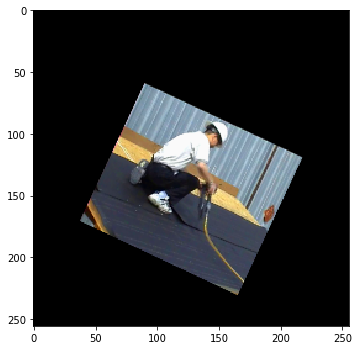

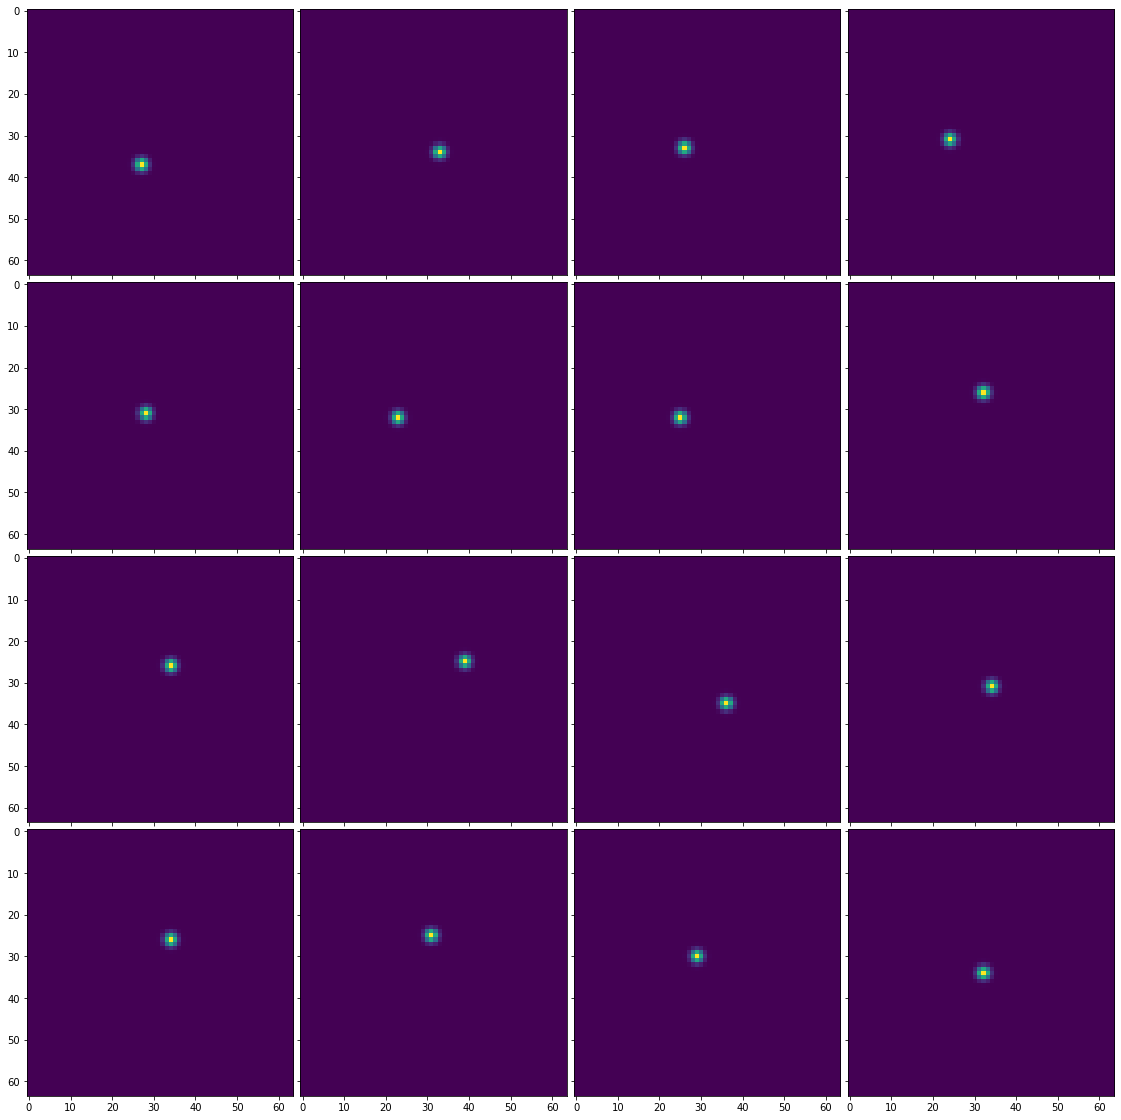

In [14]:
image, heatmap, in_kps, out_kps = train_dataset[5551]

print("Input image shape:", image.shape, "\t Heatmap Shape:", heatmap.shape)

in_image = np.transpose(image.numpy(), (1, 2, 0))
out_image = cv2.resize(in_image, (64, 64))

image_show(in_image, figsize=(5, 5))
image_grid_show(heatmap.numpy(), figsize=(20, 20))

In [ ]:
# import torch
# import torch.nn.functional as F

# x = torch.eye(10).view(1, 1, 10, 10)
# theta = torch.zeros(1, 2, 3)
# angle = np.pi/2.
# theta[:, :, :2] = torch.tensor([[np.cos(angle), -1.0*np.sin(angle)], [np.sin(angle), np.cos(angle)]])
# theta[:, :, 2] = 0.5

# grid = F.affine_grid(theta, x.size())
# x_trans = F.grid_sample(x, grid)

# plt.imshow(np.swapaxes(x.squeeze().numpy())
# plt.imshow(x_trans.squeeze().numpy())